## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The code was removed by Watson Studio for sharing.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Pre Analysis

Based on mode of shipment:

In [3]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

#### Segment based:

Box Plot of Profit vs Segment

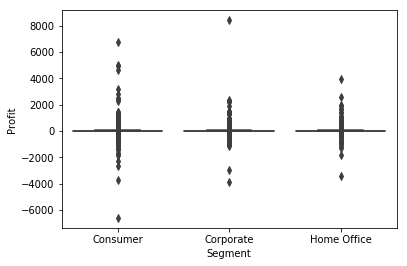

In [4]:
sns.boxplot(x='Segment', y='Profit', data=df)

In [5]:
df_segment_profit = df[['Segment','Profit']]
df_segment_profit.groupby('Segment').mean() # mean profit of each segment type

,Profit
Segment,
Consumer,25.836873
Corporate,30.456667
Home Office,33.818664


In [6]:
df['Segment'].value_counts() # counts size of each segment

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

#### Based on State and City

In [7]:
state = df['State'].value_counts() # gives count of each state in US
state.head()

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: State, dtype: int64

In [8]:
city = df['City'].unique()  # gives each of the unique cities in US
city[:5]

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle'], dtype=object)

### Statistical Summary

In [9]:
df.describe() 

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### A. First Mode of Analysis

We now create a new dataframe consists of numerical columns as above except for the 'Postal Code'

In [13]:
df1 = df
df1 = df1.rename(columns={'Sales': 'Revenue'}) # renaming of 'sales column'
df1['Expense'] = df1['Revenue']-df1['Profit']  # Creating a new derived column 
df1['Discount'] = df1['Revenue']*df1['Discount']
df1 = df1.round(2)
df1 = df1[['Segment', 'Ship Mode', 'Revenue', 'Expense', 'Discount', 'Profit', 'Quantity' ]]
df1.head()

,Segment,Ship Mode,Revenue,Expense,Discount,Profit,Quantity
0,Consumer,Second Class,261.96,220.05,0.00,41.91,2
1,Consumer,Second Class,731.94,512.36,0.00,219.58,3
2,Corporate,Second Class,14.62,7.75,0.00,6.87,2
3,Consumer,Standard Class,957.58,1340.61,430.91,-383.03,5
4,Consumer,Standard Class,22.37,19.85,4.47,2.52,2


In [14]:
df1.dtypes # lists the data type of each dataframe column

Segment       object
Ship Mode     object
Revenue      float64
Expense      float64
Discount     float64
Profit       float64
Quantity       int64
dtype: object

As parameters such as 'Revenue', 'Expense', 'Profit', 'Discount' vary over quantity, it doesn't show the proper value of each item. <br/>
So we create yet another dataframe 'df_item' that sorts this out by measuring everything per single quanity of an item.

In [15]:
df_item = df1
df_item['Expense'] = df_item['Expense']/df_item['Quantity']
df_item['Revenue'] = df_item['Revenue']/df_item['Quantity']
df_item['Profit'] = df_item['Profit']/df_item['Quantity']
df_item['Discount'] = df_item['Discount']/df_item['Quantity']
df_item = df_item[['Revenue','Expense','Discount', 'Profit']]
df_item.head()

,Revenue,Expense,Discount,Profit
0,130.980,110.025000,0.000,20.955000
1,243.980,170.786667,0.000,73.193333
2,7.310,3.875000,0.000,3.435000
3,191.516,268.122000,86.182,-76.606000
4,11.185,9.925000,2.235,1.260000


#### Correlation

In [16]:
# let's correlate the parameters with each other
df_item_corr = df_item.corr()
df_item_corr

,Revenue,Expense,Discount,Profit
Revenue,1.000000,0.922255,0.588450,0.538218
Expense,0.922255,1.000000,0.789305,0.170559
Discount,0.588450,0.789305,1.000000,-0.220919
Profit,0.538218,0.170559,-0.220919,1.000000


#### Observations:
1. 'Revenue' and 'Expense' are very strongly correlated
2. 'Discount' and 'Expense' are strongly correlated
3. 'Revenue' and 'Profit' are moderately correlated
4. 'Discount' and 'Profit' are inversely and weakly correlated

#### Inference:
1. High Sales value('Revenue') doesn't always imply high profit.
2. A majority of the extra expenditure('Expense') is accountable in the form of Discount(upto 60%).
   This has in turn led to less profits and sometimes even losses.

We look into the graphical representation of the above facts to add to the understanding, as follows

In [17]:
import seaborn as sns # seaborn provides a high-level interface for drawing attractive and informative statistical graphics.

#### Plot of Expense vs Discount

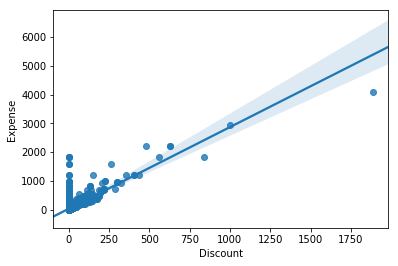

In [35]:
sns.regplot(x="Discount", y="Expense", data=df_item)

As expected, 'Discount' and 'Expense' are strongly correlated

#### Plot of Expense vs Revenue

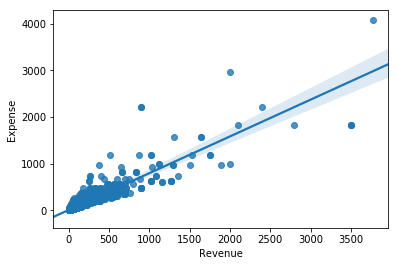

In [20]:
sns.regplot(x="Revenue", y="Expense", data=df_item)

As expected 'Revenue' and 'Expense' are very strongly correlated

#### Plot of Revenue vs Profit

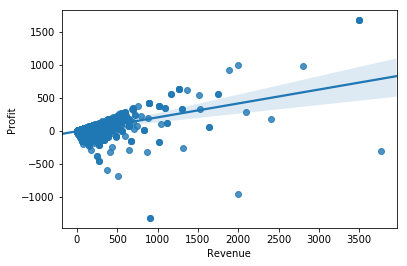

In [19]:
sns.regplot(x="Revenue", y="Profit", data=df_item)

As expected, 'Revenue' and 'Profit' are moderately correlated

#### Plot of Discount vs Profit

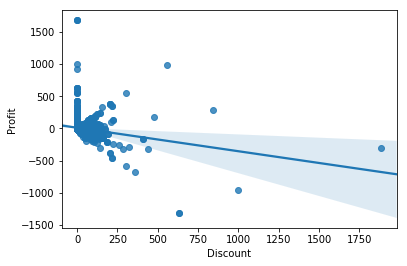

In [21]:
sns.regplot(x="Discount", y="Profit", data=df_item)

'Discount' and 'Profit' are inversely and weakly correlated

### B. Second mode of Analysis

Let's introduce the two key categorical variables'Segment' and 'Ship Mode' in order to get a fresh perspective

### 1. Profit

Profit is the most crucial factor to assess the financial situation of any business.<br/>

In [22]:
df2 = df1[['Segment','Ship Mode','Profit']]
df2.head()

,Segment,Ship Mode,Profit
0,Consumer,Second Class,20.955000
1,Consumer,Second Class,73.193333
2,Corporate,Second Class,3.435000
3,Consumer,Standard Class,-76.606000
4,Consumer,Standard Class,1.260000


In [23]:
grouped_df_profit = df2.groupby(['Segment','Ship Mode'],as_index=False).mean()
grouped_df_profit.head()

,Segment,Ship Mode,Profit
0,Consumer,First Class,7.188906
1,Consumer,Same Day,8.489512
2,Consumer,Second Class,7.082230
3,Consumer,Standard Class,6.703158
4,Corporate,First Class,9.192707


In [24]:
grouped_pivot_profit = grouped_df_profit.pivot(index='Segment',columns='Ship Mode')
grouped_pivot_profit

Profit                                       
Ship Mode   First Class   Same Day Second Class Standard Class
Segment                                                       
Consumer       7.188906   8.489512     7.082230       6.703158
Corporate      9.192707   4.186539     8.159524       7.953736
Home Office   12.850505  10.270250    11.558931       8.454492

#### We plot a heatmap to visualize the impact of buyers and shipment mode, on the profit of the company

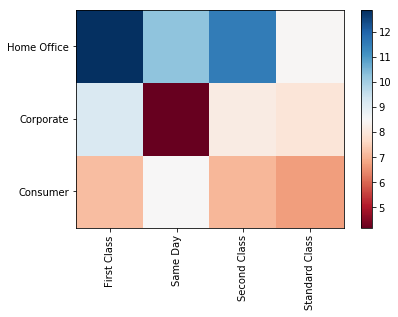

In [25]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot_profit, cmap='RdBu')

#label names
row_labels = grouped_pivot_profit.columns.levels[1]
col_labels = grouped_pivot_profit.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot_profit.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot_profit.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

- The corporate segment with the product shipped on the same day has led to the least of profit margins.<br/>
- Consumers in general haven't been lucrative either and lie on the lower strata of the profit margin.<br/>
- On the other hand, the delivery to Home Offices has contributed majorly, with the first class at the top.<br/>

### 2. Revenue (Sales)

In [26]:
df3 = df1[['Segment','Ship Mode','Revenue']]
df3.head()

,Segment,Ship Mode,Revenue
0,Consumer,Second Class,130.980
1,Consumer,Second Class,243.980
2,Corporate,Second Class,7.310
3,Consumer,Standard Class,191.516
4,Consumer,Standard Class,11.185


In [27]:
grouped_df_sales = df3.groupby(['Segment','Ship Mode'],as_index=False).mean()
grouped_pivot_sales = grouped_df_sales.pivot(index='Segment',columns='Ship Mode')
grouped_pivot_sales

Revenue                                        
Ship Mode   First Class    Same Day Second Class Standard Class
Segment                                                        
Consumer      59.974544   54.017440    58.550216      60.315063
Corporate     64.358171  104.602530    63.326941      57.376530
Home Office   77.732649   60.095646    66.856512      59.933085

#### We plot a heatmap to visualize the impact of buyers and shipment mode, on the sales revenue of the company

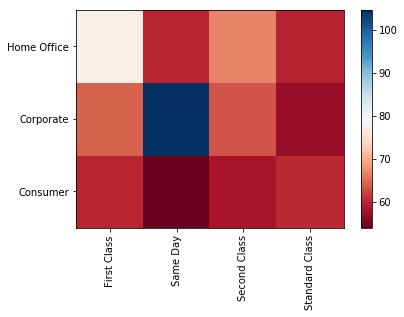

In [28]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot_sales, cmap='RdBu')

#label names
row_labels = grouped_pivot_sales.columns.levels[1]
col_labels = grouped_pivot_sales.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot_sales.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot_sales.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

The majority amount of sales revenue generated is due to Corporates who order the product on the very same day. So, this means that this section has a very high potential from the business perspective.<br/>
On the contrary, we've seen earlier that it is this very segment that generated least profits. But, what may be the reason for this?

We analyse further to find answers to the above anamoly.

### 3. Expense

In [29]:
df4 = df1[['Segment','Ship Mode','Expense']]
grouped_df_expense = df4.groupby(['Segment','Ship Mode'],as_index=False).mean()
grouped_df_expense.head()

,Segment,Ship Mode,Expense
0,Consumer,First Class,52.785717
1,Consumer,Same Day,45.528037
2,Consumer,Second Class,51.467990
3,Consumer,Standard Class,53.611948
4,Corporate,First Class,55.165564


In [30]:
grouped_pivot_expense = grouped_df_expense.pivot(index='Segment',columns='Ship Mode')
grouped_pivot_expense

Expense                                        
Ship Mode   First Class    Same Day Second Class Standard Class
Segment                                                        
Consumer      52.785717   45.528037    51.467990      53.611948
Corporate     55.165564  100.415753    55.167458      49.422831
Home Office   64.882155   49.825425    55.297767      51.478631

##### We visualize the impact of buyers and shipment mode, on the additional expenses made by the company

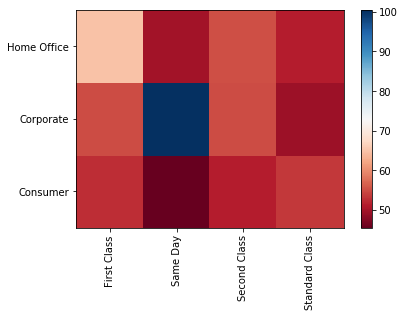

In [31]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot_expense, cmap='RdBu')

#label names
row_labels = grouped_pivot_expense.columns.levels[1]
col_labels = grouped_pivot_expense.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot_expense.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot_expense.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Logistics and discount ought to be the top 2 ingredients for evaluating the total expenditure.<br/>
From the above heat map, it's very clear that the the company spends mostly to cater to the expenses of this sector( Corporate buyers of the particular day). <br/>Considering various other parameters, and given the fact that most of the deliveries are in and around various US states and cities, a delivery on the same day ought not imply a high expenditure on the logistics aspect. Also, first class deliveries charges for consumers and home offices are on the lower side, as seen above. So, logically we may rule logistics as a factor.<br/>
So, we to look into the discounts section to provide a conclusive proof to our speculation.

### 4. Discount

In [32]:
df5 = df1[['Segment','Ship Mode','Discount']]
grouped_df_discount = df5.groupby(['Segment','Ship Mode'],as_index=False).mean()
grouped_df_discount.head()

,Segment,Ship Mode,Discount
0,Consumer,First Class,8.755395
1,Consumer,Same Day,7.270692
2,Consumer,Second Class,7.777424
3,Consumer,Standard Class,8.995751
4,Corporate,First Class,9.359170


In [33]:
grouped_pivot_discount = grouped_df_discount.pivot(index='Segment',columns='Ship Mode')
grouped_pivot_discount

Discount                                       
Ship Mode   First Class   Same Day Second Class Standard Class
Segment                                                       
Consumer       8.755395   7.270692     7.777424       8.995751
Corporate      9.359170  20.631200     7.115790       7.377163
Home Office   12.046111   8.043965     8.441642       8.519462

#### We visualize the impact of buyers and shipment mode, on the discounts offered by the company

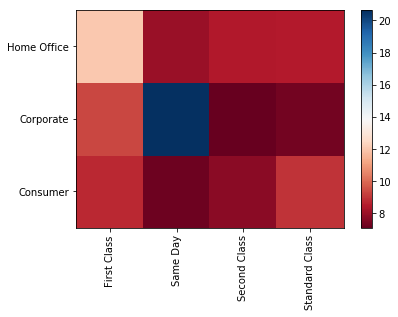

In [34]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot_discount, cmap='RdBu')

#label names
row_labels = grouped_pivot_discount.columns.levels[1]
col_labels = grouped_pivot_discount.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot_discount.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot_discount.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Yes!<br/>
We may now indeed conclude that it is the high profits offered to corporate buyer of the same day, that has contibuted significantly to a high expenditure from the company's side, and that has led to poor profits margins, despite the potentially high amount of revenue that's been generated.

This ought to be the sector the company needs to work upon, in order to improve business. 